<a href="https://colab.research.google.com/github/aravind2060/comparsion-algorithms/blob/master/Comparsion_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time


In [ ]:
# Function to time sorting algorithms and calculate average time
def time_sorting_algorithm(algorithm, datasets):
    avg_times = []
    for size, arrays in datasets.items():
        times = []
        for arr in arrays:
            try:
                start_time = time.time()
                algorithm(arr.copy())  # creating a copy of original array to avoid changing the original array
                times.append(time.time() - start_time)
            except Exception as e:
                # print(f"Error sorting array of size {size} with {algorithm.__name__}: {e}")
                times.append(float('inf'))  # Set infinity for error algos
        avg_times.append(np.mean(times))
    return avg_times


In [ ]:
# insetion sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i
        # We are trying to compare the current element with previous all elements until we reach either the beginning of the array or an element that is smaller than the current element
        while (j - 1 >= 0) and (arr[j] < arr[j - 1]):
            temp = arr[j]
            arr[j] = arr[j - 1]
            arr[j - 1] = temp
            j -= 1
    return arr;

In [ ]:
# merge sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])  # Recursively sort the left half of the array
    right = merge_sort(arr[mid:])  # Recursively sort the right half of the array

    return merge(left, right)  # Merge the sorted left and right halves

# Helper to merge two sorted arrays
def merge(left, right):
    merged = []  # empty list to store the merged array
    i = j = 0  # pointers for left and right arrays

    # Compare elements from the left and right arrays and append the smaller element to the merged array
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    # Appending to merged array if any  remaining elements from the left array
    while i < len(left):
        merged.append(left[i])
        i += 1

    # Appending to merged array if any remaining elements from the right array
    while j < len(right):
        merged.append(right[j])
        j += 1

    return merged

In [ ]:
# heap sort
def heap_sort(arr):
    def heapify(end, i):
        # Variables to track the children and the largest element
        left = 2 * i + 1
        right = 2 * i + 2
        largest = i

        # Compare the current node with its left child
        if left < end and arr[i] < arr[left]:
            largest = left
        # Compare the current largest node with the right child
        if right < end and arr[largest] < arr[right]:
            largest = right

        # If the largest node is not the current node, swap and heapify again
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(end, largest)

    n = len(arr)

    # Building the max heap by heapifying each non-leaf node
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)

    # One by one, extract elements from the heap
    for i in range(n - 1, 0, -1):
        # Move the current root (largest) to the end
        arr[i], arr[0] = arr[0], arr[i]
        # Heapify the reduced heap
        heapify(i, 0)

    return arr

In [ ]:
# Quick sort function
def quick_sort(arr):
    # Helper function to perform the recursive sort
    def sort(arr, low, high):
        if low < high:
            # Partition the array and get the pivot index
            pivot_index = partition(arr, low, high)
            # Recursively sort the elements before and after partition
            sort(arr, low, pivot_index - 1)
            sort(arr, pivot_index + 1, high)

    # Helper function to partition the array
    def partition(arr, low, high):
        pivot = arr[high]  # Choose the last element as the pivot
        i = low - 1  # Pointer for the smaller element

        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1  # Move the pointer for the smaller element
                arr[i], arr[j] = arr[j], arr[i]  # Swap the elements

        # Place the pivot element in the correct position
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    # Initial call to the sort function with the full array
    sort(arr, 0, len(arr) - 1)
    return arr

In [ ]:
def modified_quick_sort(arr):

    # For small subarrays, insertion sort is used,
    # and the median of three is chosen as the pivot for partitioning.

    # Step 1: insertion sort to handle small subarrays
    def insertion_sort(sub_arr):
        for i in range(1, len(sub_arr)):
            j = i
            while j > 0 and sub_arr[j] < sub_arr[j - 1]:  # Ensure j > 0 to prevent index error
                sub_arr[j], sub_arr[j - 1] = sub_arr[j - 1], sub_arr[j]  # Swap elements
                j -= 1
        return sub_arr

    # Step 2: find the median of three elements and use it as the pivot
    def find_median(arr, low, high):
        mid = (high + low) // 2
        a, b, c = arr[low], arr[mid], arr[high]
        if a <= b <= c or c <= b <= a:
            return mid
        elif b <= a <= c or c <= a <= b:
            return low
        else:
            return high

    # Step 3: Partition the array using the pivot found by median of three
    def modified_partition(arr, low, high):
        median = find_median(arr, low, high)
        arr[median], arr[high] = arr[high], arr[median]  # Swap the median with the last element
        return partition(arr, low, high)

    # Step 4: Partition the array around a pivot element
    def partition(arr, low, high):
        pivot = arr[high]  # Last element as pivot
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]  # Swap elements smaller than pivot
        arr[i + 1], arr[high] = arr[high], arr[i + 1]  # Place pivot in correct position
        return i + 1

    # Step 5: Recursive sort with modified quick sort logic
    def sort(arr, low, high):
        if high - low + 1 < 10:
            insertion_sort(arr[low:high + 1])  # Use insertion sort for small subarrays
        elif low < high:
            pi = modified_partition(arr, low, high)  # Partition and get pivot index
            sort(arr, low, pi - 1)  # Recursively sort elements before pivot
            sort(arr, pi + 1, high)  # Recursively sort elements after pivot

    # Step 6: Initial call to sort the entire array
    sort(arr, 0, len(arr) - 1)
    return arr

In [ ]:
def generate_random_numbers(size, low=0, high=100000):
    # It generates numpy.ndarray of elements
    return np.random.randint(low, high, size)

In [ ]:
# Define the sizes of the arrays
# sizes = [1000, 2000, 3000, 5000, 10000, 20000, 30000, 40000, 50000, 60000]

sizes = [1000,2000 ,3000, 5000]

In [ ]:
# Storing random numbers for different sizes
# Generate a dictionary where each key is the size and the value is a list of arrays for that size
random_datasets = {size: [generate_random_numbers(size) for _ in range(5)] for size in sizes}
print(random_datasets)

{1000: [array([94871, 90533, 52199, 92980, 34488, 11378, 53630, 58118, 70726,
       39022, 12814, 79263,  9538, 57847, 78203, 89577, 30296, 43523,
       58804, 53251, 89804, 52392, 94405, 67173, 27819, 96233, 17696,
       43073, 19462, 62780,  3348, 85968, 24069, 18361, 48738, 78974,
       83130, 87209, 96613, 16455, 59087, 44915, 19881, 13698, 58375,
       96653, 34363, 63598, 83744, 47780, 69891,  6570, 72337, 10523,
       65245, 10909, 40148, 69301, 73083, 61157, 80449, 53452, 38344,
       85673, 91535, 20278, 18792, 47352, 17470, 70125, 56240, 94157,
       70211, 33340, 17775, 93035, 47686, 47046, 34570, 89019,   513,
       39609, 45750, 34792, 78418, 81188, 25194, 18816, 28492, 22156,
       67245, 97681, 17478, 40100,  5431, 37515, 13153, 45171, 85384,
       21312, 27253, 44034, 50272, 79562, 98604, 83693, 43683, 46735,
       79964, 66487, 99569, 94973, 86856, 30907, 72312, 16353, 70541,
       81283, 44820,   642, 72500, 95937, 84053, 68363, 18827, 46862,
        1273

In [ ]:
def plot_algorithm_performance(labelX,labelY,title,sizes, times_data, algorithm_labels):

    plt.figure(figsize=(12, 8))  # Set the figure size for better readability

    for times, label in zip(times_data, algorithm_labels):
        plt.plot(sizes, times, label=label, marker='o')

    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

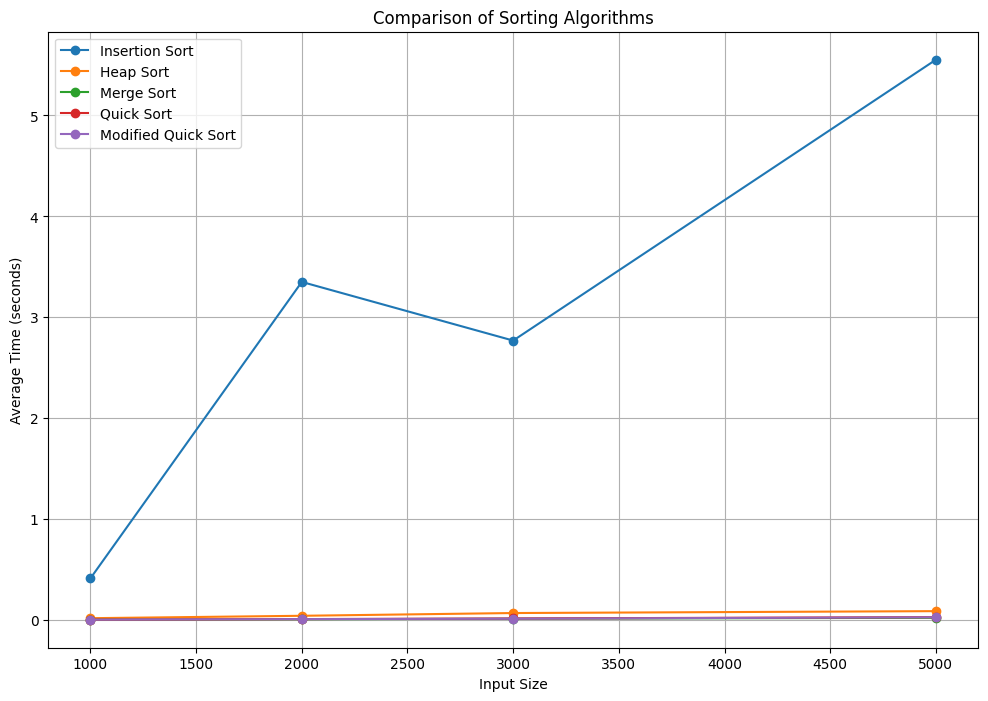

In [ ]:
insertion_sort_times = time_sorting_algorithm(insertion_sort, random_datasets);
heap_sort_times = time_sorting_algorithm(heap_sort, random_datasets);
merge_sort_times = time_sorting_algorithm(merge_sort, random_datasets);
quick_sort_times = time_sorting_algorithm(quick_sort, random_datasets);
modified_quick_sort_times = time_sorting_algorithm(modified_quick_sort, random_datasets);


algorithm_names = ['Insertion Sort', 'Heap Sort', 'Merge Sort', 'Quick Sort', 'Modified Quick Sort']
algorithm_times = [insertion_sort_times, heap_sort_times, merge_sort_times, quick_sort_times, modified_quick_sort_times]

plot_algorithm_performance("Input Size","Average Time (seconds)","Comparison of Sorting Algorithms",sizes, algorithm_times, algorithm_names)

In [ ]:
# Creating copies of sorted and reverse sorted datasets from same original dataset
sorted_datasets = {size: [np.sort(arr.copy()) for arr in arrays] for size, arrays in random_datasets.items()}
print(sorted_datasets)
reverse_sorted_datasets = {size: [np.sort(arr.copy())[::-1] for arr in arrays] for size, arrays in random_datasets.items()}

{1000: [array([  160,   213,   285,   320,   449,   513,   642,   644,   861,
        1273,  1330,  1427,  1473,  1556,  1652,  1784,  2021,  2081,
        2427,  2574,  2591,  2790,  2929,  3108,  3348,  3722,  3801,
        3822,  3881,  3955,  4215,  4378,  4395,  4466,  4608,  4633,
        5047,  5060,  5431,  5534,  5642,  5828,  6036,  6087,  6102,
        6279,  6431,  6533,  6541,  6570,  6679,  6687,  6834,  6984,
        7202,  7214,  7425,  7515,  7641,  7807,  7830,  7832,  7949,
        7967,  8072,  8191,  8549,  8671,  8933,  9068,  9137,  9167,
        9400,  9505,  9538,  9561,  9598,  9621,  9623,  9633,  9673,
        9973, 10111, 10215, 10264, 10265, 10294, 10508, 10523, 10550,
       10622, 10909, 11065, 11155, 11216, 11316, 11342, 11378, 11422,
       11606, 11737, 11908, 11911, 11930, 12056, 12341, 12409, 12542,
       12581, 12696, 12814, 12823, 12881, 12997, 13056, 13114, 13133,
       13142, 13153, 13245, 13698, 13711, 13720, 13766, 13791, 14054,
       14086

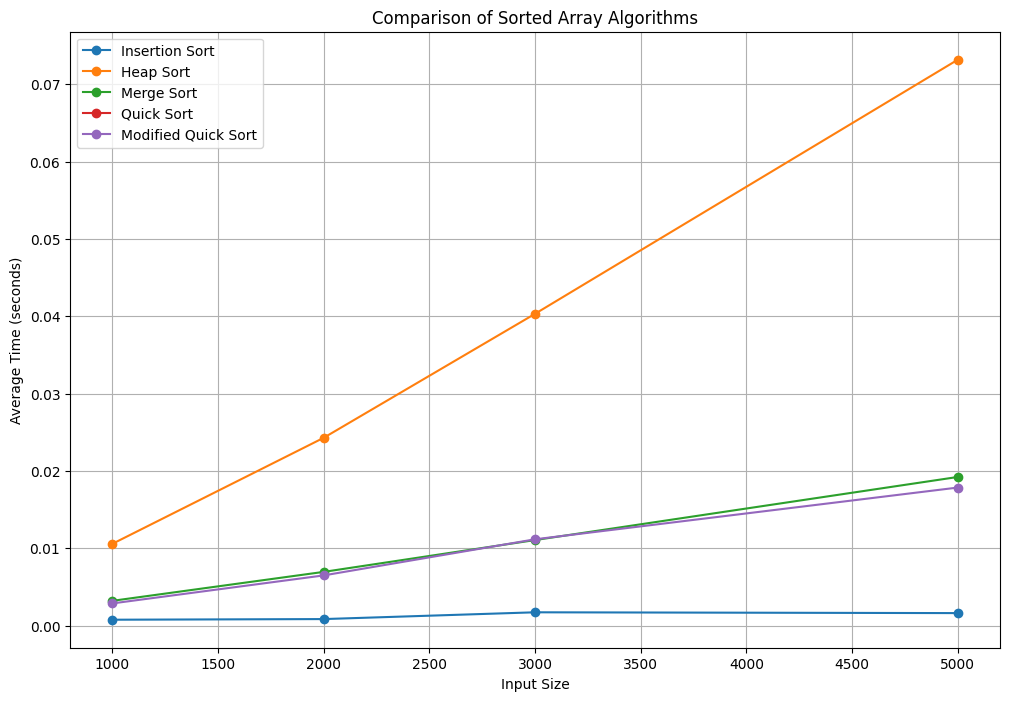

In [ ]:
# Measure performance on sorted datasets
sorted_insertion_sort_times = time_sorting_algorithm(insertion_sort, sorted_datasets)
sorted_heap_sort_times = time_sorting_algorithm(heap_sort, sorted_datasets)
sorted_merge_sort_times = time_sorting_algorithm(merge_sort, sorted_datasets)
sorted_quick_sort_times = time_sorting_algorithm(quick_sort, sorted_datasets)
sorted_modified_quick_sort_times = time_sorting_algorithm(modified_quick_sort, sorted_datasets)

# Plotting performance on sorted arrays
algorithm_names = ['Insertion Sort', 'Heap Sort', 'Merge Sort', 'Quick Sort', 'Modified Quick Sort']
sorted_algorithm_times = [
    sorted_insertion_sort_times,
    sorted_heap_sort_times,
    sorted_merge_sort_times,
    sorted_quick_sort_times,
    sorted_modified_quick_sort_times
]

plot_algorithm_performance("Input Size","Average Time (seconds)","Comparison of Sorted Array Algorithms",sizes, sorted_algorithm_times, algorithm_names)

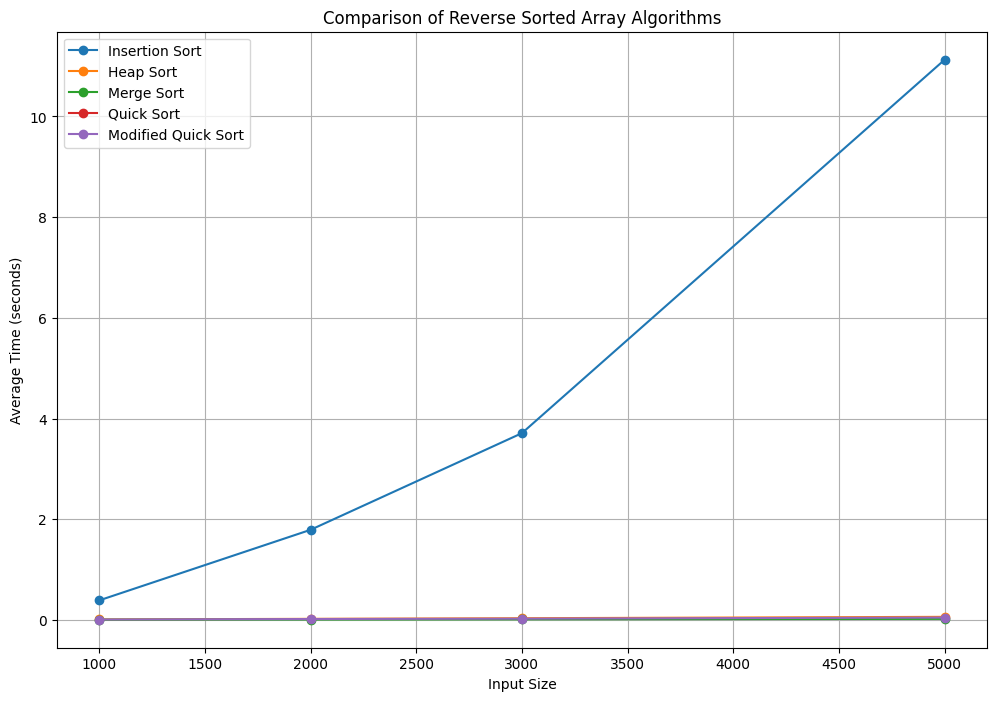

In [ ]:
# Measure performance on reverse sorted datasets
reverse_sorted_insertion_sort_times = time_sorting_algorithm(insertion_sort, reverse_sorted_datasets)
reverse_sorted_heap_sort_times = time_sorting_algorithm(heap_sort, reverse_sorted_datasets)
reverse_sorted_merge_sort_times = time_sorting_algorithm(merge_sort, reverse_sorted_datasets)
reverse_sorted_quick_sort_times = time_sorting_algorithm(quick_sort, reverse_sorted_datasets)
reverse_sorted_modified_quick_sort_times = time_sorting_algorithm(modified_quick_sort, reverse_sorted_datasets)

# Plotting performance on reverse sorted arrays
reverse_sorted_algorithm_times = [
    reverse_sorted_insertion_sort_times,
    reverse_sorted_heap_sort_times,
    reverse_sorted_merge_sort_times,
    reverse_sorted_quick_sort_times,
    reverse_sorted_modified_quick_sort_times
]

plot_algorithm_performance("Input Size","Average Time (seconds)","Comparison of Reverse Sorted Array Algorithms",sizes, reverse_sorted_algorithm_times, algorithm_names)
